

download the data
put into a dataframe, look at how it looks like



TODO:

Check for non-english words
Might remove extremely rare words as well

In [33]:
# General
import collections
import re

# Pandas, numpy
import numpy as np
import pandas as pd

# NLP related
import nltk
import spacy

# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Download dataset

In [10]:
def download_dataset():
  !curl https://storage.googleapis.com/atomic-bird-188013.appspot.com/archive.zip -o archive.zip
  !unzip 'archive.zip'

def load_dataset():
  df = pd.read_csv('MBTI 500.csv')
  return df

In [12]:


# download_dataset()

df = load_dataset()
# download and extract data

## High level data exploration

Aims to clear additional words might not needed

In [15]:
df

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [ ]:
# Plot distribution of data

# num_col_count = len(numeric_columns_list)
# plt.figure(figsize=(20, 7))

# print(numeric_columns_list)
# # return 

# for i in range(num_col_count):
#   ax = plt.subplot(2, 4, i + 1)
#   col_name = numeric_columns_list[i]
#   col = obesity_df[col_name]
#   plt.xlabel(col_name)
#   ax.hist(col, bins='auto')

# plt.tight_layout()


In [19]:
%%time

df_tokenized = df['posts'].apply(lambda x: nltk.word_tokenize(x)) # NLTK tokenizer, might use spaCy instead

CPU times: user 3min 14s, sys: 3.68 s, total: 3min 18s
Wall time: 3min 23s


,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
5,loose stop overthinking everything ruin friend...,INTJ
6,often men one put chance get burn otherwise no...,INTJ
7,early definitely relate quiet self destruction...,INTJ
8,one full list would impossibly long quotable f...,INTJ
9,technique information power share unless absol...,INTJ


In [20]:
df_tokenized[:10]

0         [know, intj, tool, use, interaction, people, e...
1         [rap, music, ehh, opp, yeah, know, valid, well...
2         [preferably, p, hd, low, except, wew, lad, vid...
3         [drink, like, wish, could, drink, red, wine, g...
4         [space, program, ah, bad, deal, meing, freelan...
                                ...                        
106062    [stay, frustrate, world, life, want, take, lon...
106063    [fizzle, around, time, mention, sure, mistake,...
106064    [schedule, modify, hey, w, intp, strong, wing,...
106065    [enfj, since, january, busy, schedule, able, s...
106066    [feel, like, men, good, problem, tell, parent,...
Name: posts, Length: 106067, dtype: object

In [ ]:
# tokenized_docs = [[word.lower() for word in doc] for doc in df_tokenized]


In [ ]:
# len_words = np.array([len(tokenized_doc) for tokenized_doc in tokenized_docs])

# df[:10]

In [ ]:

all_words = [word for doc in tokenized_docs for word in doc]

all_words_counter = collections.Counter(all_words)
all_words_counter.most_common(50)

Text(0.5, 1.0, 'The 40 most common words')

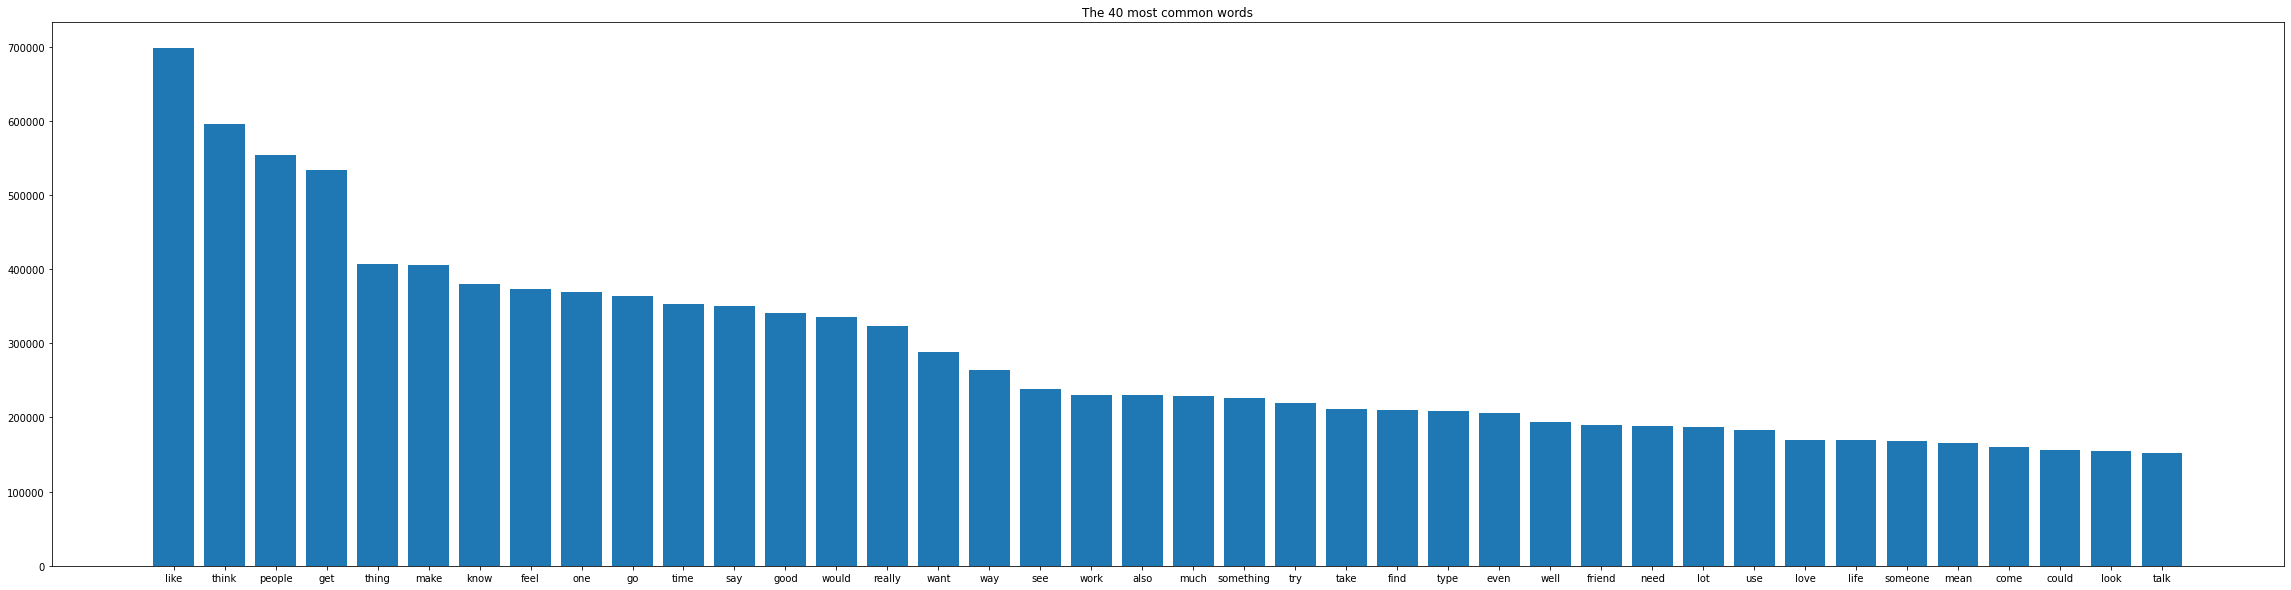

In [23]:
all_words = [word for doc in df_tokenized for word in doc]

all_words_counter = collections.Counter(all_words)
all_words_counter.most_common(50)

x, y = zip(*all_words_counter.most_common(40))
fig, ax = plt.subplots(figsize=(40, 10))
ax.bar(x, y)
ax.set_title('The 40 most common words')

In [28]:
# filtered_words_stop = [word for word in alll_words if word not in stopwords]
# filtered_words_stop_counter = collections.Counter(filtered_words_stop)

def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

df_contains_digits = [word for word in all_words if word.isdigit() or has_numbers(word)]
                                                     


# var string = "asdas"
# string.is

# digits
# print('Numebr of digits')
# df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

# digits



In [31]:
# This probably should removed
df_contains_digits

['thoughty²',
 'office²',
 'sandbox²',
 'mi²',
 'gram²',
 'ñðµð¼ð½ð¾ð¹',
 '³',
 'x₁',
 'y₁',
 'z₁',
 'm²',
 'ft²',
 '²',
 'm²',
 'sledgehammer¹',
 '¹',
 'karaoke¹',
 '¹',
 'mc²',
 'relationships¹',
 'physically²',
 'temporally³',
 '¹',
 '²',
 '³',
 'km²',
 'r²',
 'x²',
 '³',
 'm²',
 'istp²',
 '²',
 'r²',
 'i²',
 'n²',
 't²',
 'p²',
 'a²',
 'b²',
 'c²',
 'mc²',
 'e²',
 'mc²',
 '²',
 '²',
 '²',
 'm²',
 'm²',
 'km²',
 'km²',
 'm²',
 'km²',
 'à¹ââ',
 'à¹',
 '³',
 'again²',
 '³',
 '²',
 '²',
 'ðµð¹',
 'ðð³ððñœð½ððºð¾ð²',
 'ñð¾ñð¾ð³ñðñðð']

These are very odd results, we might need to remove these

In [ ]:
# We might wanna double check stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

## Not so high level data exploration